Clasificación de vinos
---
Existen muchos modelos diferentes para clasificar y cada uno de ellos tiene sus ventajas y limitaciones. En el próximo ejercicio, predeciremos el tipo de vino (blanco o tinto) usando el modelo de K-nearest neighbors (o el de los k vecinos más cercanos).

Usaremos el modelo **K-nearest neighbors** para clasificar el tipo de vino. Este algoritmo puede clasificar las diferentes clases, por ejemplo, tinto o blanco, de acuerdo a cuán cerca están sus características unas de otras. Los nuevos datos se clasifican asignando el nuevo objeto a la clase más común entre sus k vecinos más cercanos. Para más información, se puede mirar en [Una introducción al aprendizaje estadístico](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) de James, Witten, Hastie y Tibshirani.

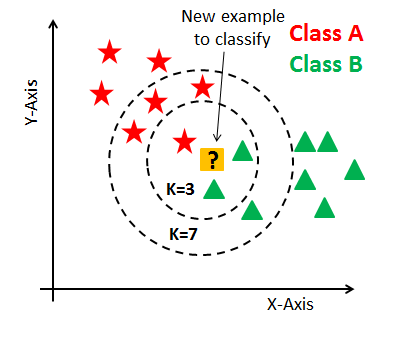

Primero, importa el conjunto de datos del vino tinto y blanco y concaténalos de la misma manera que lo hicimos en los cuadernos.

```
import pandas as pd

df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_red['hue'] = '1' #En lugar de "hue", puedes nombrar esta columna como quieras, por ejemplo, podría llamarse "color" o "Juan".
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df_white['hue'] = '0'


df_wine = pd.concat([..., ...], ignore_index=True)
```


In [ ]:
import pandas as pd

df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_red['hue'] = '1'
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df_white['hue'] = '0'

df_wine = pd.concat([df_red, df_white], ignore_index=True)

Lo siguiente que hay que hacer es dividir los datos en un set de entrenamiento (train) y uno de evaluación (test) con la misma función que usamos en el cuaderno. El conjunto de entrenamiento debe ser el 77% de los datos y el de evaluación el 33%. Recuerda que el objetivo o target ("_y_") debe ser un DataFrame de una sola columna (se llama Serie) que indique la clase del objeto, en este caso, el tipo o color del vino. Las características o _features_ ("_X_") deben ser un DataFrame con todas las demás columnas (que aporten información que influya sobre el color del vino) excepto el _target_.

```
from sklearn.model_selection import train_test_split

X = df.drop([...], axis=1)
y = df[...]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ... , random_state=42)
```



In [ ]:
from sklearn.model_selection import train_test_split

X = df_wine.drop(['quality', 'hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Para hacer mejores predicciones, normalizá los datos de las _features_ usando la función `StandardScaler()` de la misma manera que lo hicimos en el cuaderno.

```
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(...)
X_train = scaler.transform(...) # De esta forma, el set X_train se encuentra normalizado
X_test = scaler.transform(...)
```



In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Luego tendrás que importar y crear el _KNeighborsClassifier_ de la biblioteca _sklearn.neighbors_. Para hacer el clasificador habrá que indicar el parámetro n_neighbors, que indica el valor de k y podría ser 3. En KNN, k es el número de vecinos más cercanos. Decidir el número "correcto" es importante, no sólo porque el algoritmo requiere dicho parámetro, sino también porque el número apropiado de vecinos más cercanos determina su rendimiento.

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = ...)
```



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

Ahora queda ajustar el modelo usando los datos de entrenamiento con la función `knn.fit( ... , ... )` de la misma forma que se hizo en el cuaderno.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Ahora que tenemos nuestro modelo entrenado, lo siguiente es evaluar las predicciones hechas por este. Para hacerlo, generá una Serie predicciones del conjunto de _features_ de evaluación usando la función
`predict()` y luego usá esas predicciones para calcular el _score_ de precisión, hacer la matriz de confusión y el informe de clasificación.

```
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = knn.predict(...)
print("Score: " + str(accuracy_score(..., ...)))
print("\nMatriz de confusión: \n" + str(confusion_matrix(..., ...)))
print("\nReporte de clasificación: \n" + str(classification_report(..., ...)))

```

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)

print("Score: " + str(accuracy_score(y_test, y_pred)))
print("\nMatriz de confusión: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nReporte de clasificación: \n" + str(classification_report(y_test, y_pred)))

Score: 0.9911421911421912

Matriz de confusión: 
[[1581    7]
 [  12  545]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1588
           1       0.99      0.98      0.98       557

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145



Finalmente, según la evaluación, podés preguntarte qué tan bueno fue tu modelo predictivo. ¿Puede ser mejor? Siempre hay formas de pulirlo u optimizarlo. En este caso, tal vez haya otro valor para k que mejore el _score_ del modelo. ¡Intenta encontrarlo!
A primera vista, hay dos maneras de hacerlo. Una sería probar manualmente el modelo para diferentes valores de k y guardar los resultados para compararlos. ¡Otra forma sería hacer que la computadora haga ese trabajo por vos! Si te sentis valiente, intentá hacerlo creando una función (como en el primer cuaderno) que utilice el _dataset_ de datos del vino (df_wine) y el valor de k como parámetros y devuelva la puntuación o el _score_ del modelo llevando a cabo todos los pasos anteriores (dividir los datos, normalizarlos, hacer el modelo, entrenarlo y calcular el _score_). Luego, podés evaluar el modelo para un rango de valores de k (usando un bucle _for_) e imprimir los resultados, o mejor aún, ¡graficarlos!

Nota: _Si es la primera vez que trabajas con un lenguaje de programación, este último ejercicio puede ser complicado. No te frustres si no funciona, mejor consulta a los profesores y a tus compañeros. Podés continuar con el siguiente cuaderno incluso sin hacer este ejercicio._

In [ ]:
def pred(data, k ):
  df = data.copy()
  X = df.drop(['quality', 'hue'], axis=1)
  y = df['hue']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
  scaler = preprocessing.StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  score = accuracy_score(y_test, y_pred)

  #print(f"Score: " + str(score) + f' para k = {k}')
  return score


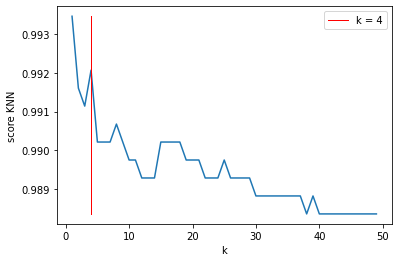

In [ ]:
import matplotlib.pyplot as plt

score = []
k = [i for i in range(1,50)]
for i in k:
  score.append(pred(df_wine,i))

k0 = 4
plt.plot(k,score)
plt.xlabel('k')
plt.ylabel('score KNN')
plt.plot([k0,k0],[min(score),max(score)],'r',lw = 1,label = f'k = {k0}')
plt.legend()
plt.show()

¿Encontraste otro valor de k que podría mejorar el rendimiento?

Un modelo con k = 1 puede tener el mejor rendimiento, pero hay que tener cuidado, porque es muy probable que el modelo esté sobreajustando los datos (lo que se llama _overfitting_). Para más información, podés consultar este [artículo](https://medium.com/swlh/overfitting-vs-underfitting-d742b4ffac57).